<a href="https://colab.research.google.com/github/JoannJibin/Superstore-Sales-Analysis/blob/main/Superstore_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd   # data analysis
import numpy as np    # numerical operations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load CSV into a DataFrame

df = pd.read_csv("Superstore.csv", encoding='latin1')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## **Basic Data Inspection & Cleaning**

In [3]:
# Shape of dataset (rows, columns)
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns)


Shape: (9994, 21)
Columns: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [4]:
# Info about datatypes + missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
# Quick stats (mean, min, max, quartiles)
df.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# Check for null values
df.isnull().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [7]:
# Check for duplicates
df.duplicated().sum()


np.int64(0)

In [8]:
# Fix data types if needed (e.g., Order Date to datetime)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Verify cleaning
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## **Exploratory Data Analysis (EDA)**

In [9]:
# Total Sales & Profit
print("Total Sales:", df['Sales'].sum())
print("Total Profit:", df['Profit'].sum())

Total Sales: 2297200.8603000003
Total Profit: 286397.0217


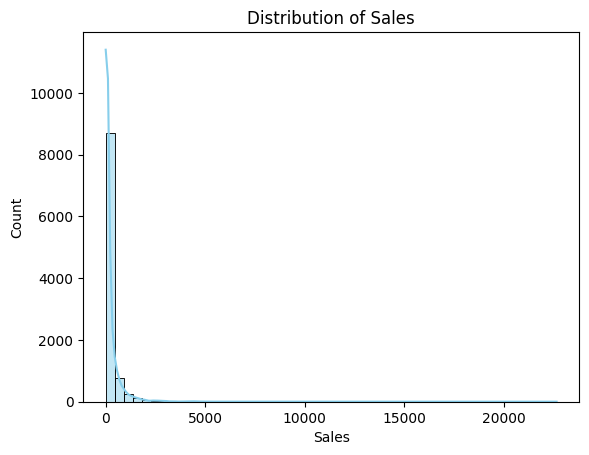

In [10]:
# Distribution of Sales Histogram
plt.figure()
sns.histplot(df['Sales'], bins=50, color='skyblue', kde=True)
plt.title("Distribution of Sales")
plt.show()

/tmp/ipython-input-1244558550.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Category", y="Sales", data=df, estimator = sum, ci = None)


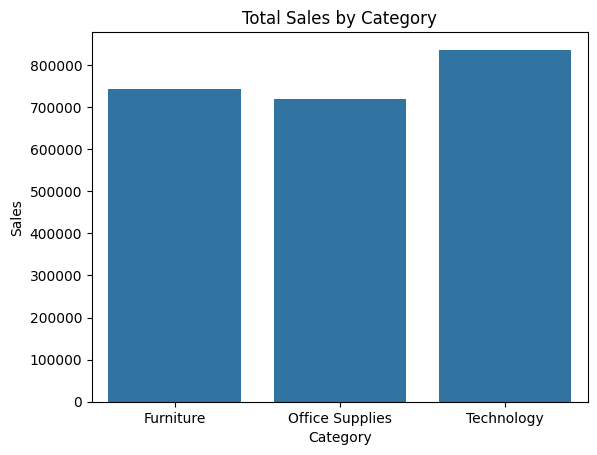

In [11]:
#Sales by Category
plt.figure()
sns.barplot(x="Category", y="Sales", data=df, estimator = sum, ci = None)
plt.title("Total Sales by Category")
plt.show()

/tmp/ipython-input-2712090074.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "Region", y = "Profit", data = df, estimator = sum, ci = None)


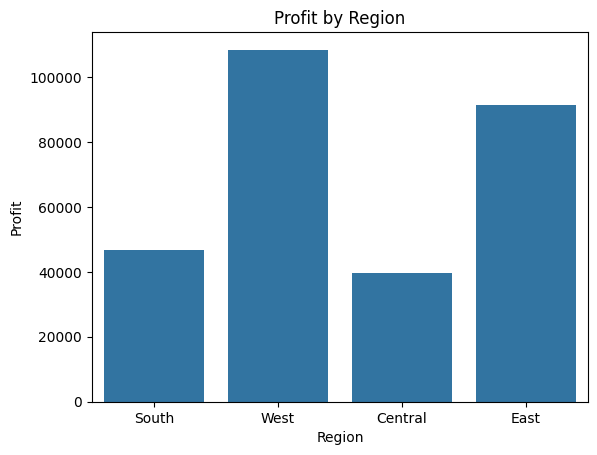

In [12]:
#Profit by Region
plt.figure()
sns.barplot(x = "Region", y = "Profit", data = df, estimator = sum, ci = None)
plt.title("Profit by Region")
plt.show()


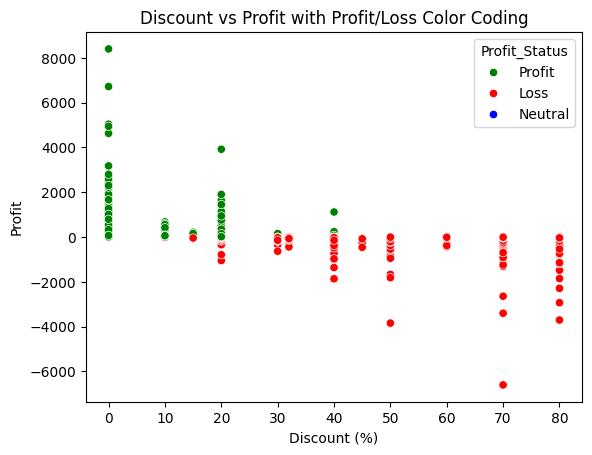

In [13]:
#Discount vs Profit
def profit_category(profit):
    if profit < 0:
        return 'Loss'
    elif profit == 0:
        return 'Neutral'
    else:
        return 'Profit'

df['Profit_Status'] = df['Profit'].apply(profit_category)

# Convert discount to percentage for readability
df['Discount_percent'] = df['Discount'] * 100

plt.figure()
sns.scatterplot(
    x='Discount_percent',
    y='Profit',
    hue='Profit_Status',   # color by Profit_Status
    palette={'Loss':'red', 'Neutral':'blue', 'Profit':'green'},
    data=df
)
plt.title("Discount vs Profit with Profit/Loss Color Coding")
plt.xlabel("Discount (%)")
plt.ylabel("Profit")
plt.show()


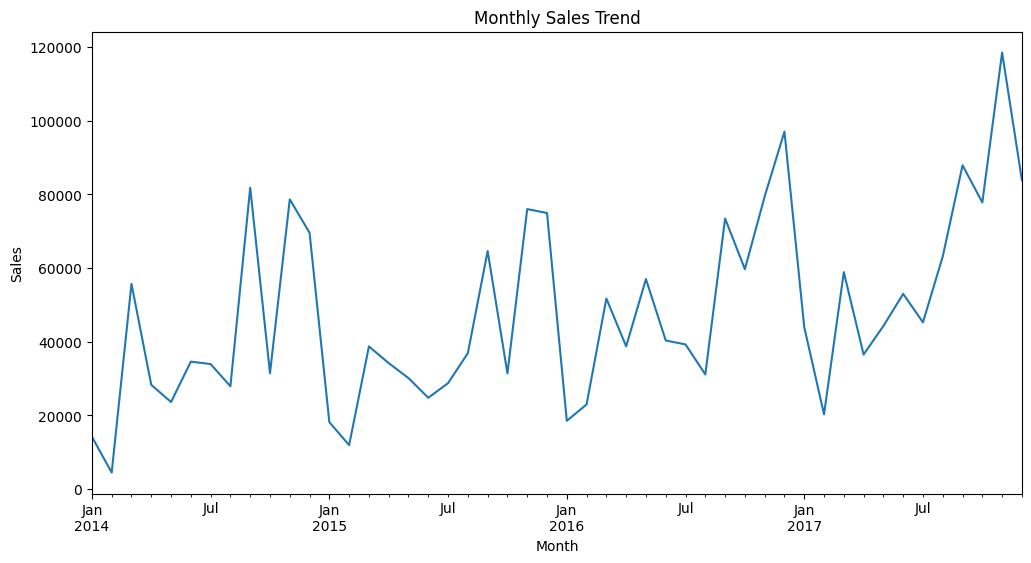

In [14]:
#Sales over time
# Group by month
df['Month'] = df['Order Date'].dt.to_period("M")
monthly_sales = df.groupby("Month")['Sales'].sum()

monthly_sales.plot(figsize=(12, 6))
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()


In [15]:
# Save cleaned data for Power BI
df.to_csv("cleaned_superstore.csv", index=False)

# Download the file
from google.colab import files
#files.download("cleaned_superstore.csv")


# **CLUSTERING**

In [18]:
# --- Step 1: Feature Engineering ---
# We need to create a customer-centric dataset.
# Let's aggregate data for each customer based on their purchasing behavior.
customer_df = df.groupby('Customer ID').agg({
    'Sales': 'sum',          # Total money spent by the customer
    'Order ID': 'nunique',   # Total number of unique orders (frequency)
    'Quantity': 'sum'        # Total number of items purchased
}).reset_index()

customer_df.rename(columns={'Sales': 'TotalSales', 'Order ID': 'TotalOrders', 'Quantity': 'TotalQuantity'}, inplace=True)

print("--- Aggregated Customer Data ---")
print(customer_df.head())
print("\n")

print(customer_df.describe())
print("\n")



--- Aggregated Customer Data ---
  Customer ID  TotalSales  TotalOrders  TotalQuantity
0    AA-10315    5563.560            5             30
1    AA-10375    1056.390            9             41
2    AA-10480    1790.512            4             36
3    AA-10645    5086.935            6             64
4    AB-10015     886.156            3             13


         TotalSales  TotalOrders  TotalQuantity
count    793.000000   793.000000     793.000000
mean    2896.848500     6.316520      47.759142
std     2628.670117     2.550885      24.842915
min        4.833000     1.000000       2.000000
25%     1146.050000     5.000000      30.000000
50%     2256.394000     6.000000      44.000000
75%     3785.276000     8.000000      63.000000
max    25043.050000    17.000000     150.000000




In [19]:
# --- Step 2: Data Scaling ---
# K-Means is sensitive to the scale of features. We'll scale them using StandardScaler.
features = customer_df[['TotalSales', 'TotalOrders', 'TotalQuantity']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=['TotalSales', 'TotalOrders', 'TotalQuantity'])

print(scaled_df.mean())
print(scaled_df.std())



TotalSales       3.136065e-17
TotalOrders      8.064167e-17
TotalQuantity   -8.960186e-17
dtype: float64
TotalSales       1.000631
TotalOrders      1.000631
TotalQuantity    1.000631
dtype: float64


Elbow method plot saved as elbow_method.png
Based on the plot, choose the 'elbow' point as the optimal number of clusters.



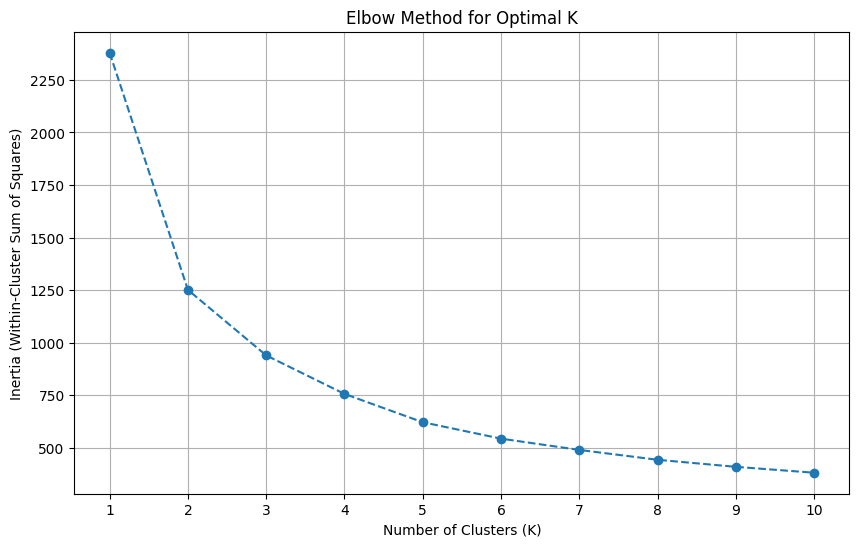

In [20]:
# --- Step 3: Finding the Optimal Number of Clusters (Elbow Method) ---
# We'll run K-Means for a range of cluster numbers (1 to 10) and plot the inertia.
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('elbow_method.png')
print("Elbow method plot saved as elbow_method.png")
print("Based on the plot, choose the 'elbow' point as the optimal number of clusters.\n")


In [21]:
# --- Step 4: Applying K-Means with the Chosen K ---
# Let's assume the elbow is at K=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(scaled_df)


In [22]:
# --- Step 5: Analyzing the Clusters ---
# Let's look at the average characteristics of each customer segment.
cluster_analysis = customer_df.groupby('Cluster')[['TotalSales', 'TotalOrders', 'TotalQuantity']].mean().reset_index()
print(f"--- Analysis of {optimal_k} Customer Segments ---")
print(cluster_analysis)


--- Analysis of 3 Customer Segments ---
   Cluster   TotalSales  TotalOrders  TotalQuantity
0        0  7225.177391     9.273504      85.735043
1        1  1410.118701     4.261708      28.283747
2        2  3003.137434     7.594249      56.150160



# **Interpretation:**

*   Cluster 0: Might be 'High-Value/Bulk Purchasers' (very high sales and quantity).

*   Cluster 1: Might be 'Low-Value Customers' (low sales, few orders).

* Cluster 2: Might be 'Frequent/Average Customers' (moderate sales and orders.)

3D scatter plot of customer segments saved as customer_segments_3d.png


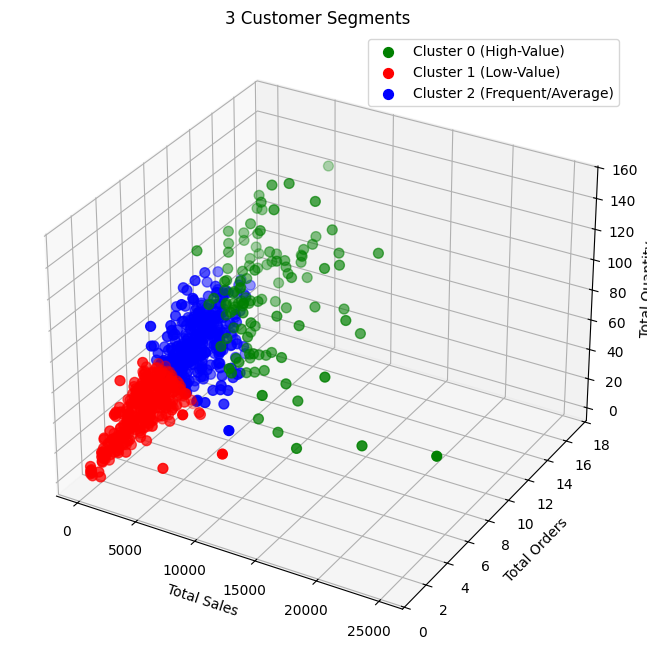

In [23]:
# --- Step 6: Visualizing the Clusters ---
# A 3D scatter plot is great for visualizing three features.
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
ax.scatter(customer_df[customer_df['Cluster'] == 0]['TotalSales'],
           customer_df[customer_df['Cluster'] == 0]['TotalOrders'],
           customer_df[customer_df['Cluster'] == 0]['TotalQuantity'],
           s=50, c='green', label='Cluster 0 (High-Value)')

ax.scatter(customer_df[customer_df['Cluster'] == 1]['TotalSales'],
           customer_df[customer_df['Cluster'] == 1]['TotalOrders'],
           customer_df[customer_df['Cluster'] == 1]['TotalQuantity'],
           s=50, c='red', label='Cluster 1 (Low-Value)')

ax.scatter(customer_df[customer_df['Cluster'] == 2]['TotalSales'],
           customer_df[customer_df['Cluster'] == 2]['TotalOrders'],
           customer_df[customer_df['Cluster'] == 2]['TotalQuantity'],
           s=50, c='blue', label='Cluster 2 (Frequent/Average)')

ax.set_title(f'{optimal_k} Customer Segments')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Total Orders')
ax.set_zlabel('Total Quantity')
ax.legend()
plt.savefig('customer_segments_3d.png')
print("3D scatter plot of customer segments saved as customer_segments_3d.png")